<a href="https://colab.research.google.com/github/GallardoCoriaMarcelo/Laboratorios/blob/main/Kmeans_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LABORATORIO 6 (SIS420-COM300)**

Lisbeth Fernandez Muruchi (Ing. Sistemas)

Marcelo Daniel Gallardo Coria (Ing. en Diseño y Animación Digital)

Lino Fernando Villca Jaita (Ing. en Ciencias De La Computación)

**Temática** (lo que se quiere buscar con el dataset):  comprender el comportamiento del clientes mediante datos de este en su comportamiento al tipo de producto que elegi mediante sus datos de preferencia al realizar compras.

URL del Dataset: https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data

Nombre: customer_segmentation_data.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carga del dataset desde google drive:

In [2]:
import pandas as pd

# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/customer_segmentation_data.csv')

Fase de preprocesamiento:

In [3]:
# Lista de columnas que deseas eliminar
columnas_eliminar = ['Customer ID', 'Purchase History', 'Segmentation Group']

# Eliminar las columnas
df = df.drop(columns=columnas_eliminar)

nombres_columnas = df.columns

# Imprimir los nombres de las columnas
print(nombres_columnas)




Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Interactions with Customer Service',
       'Insurance Products Owned', 'Coverage Amount', 'Premium Amount',
       'Policy Type', 'Customer Preferences',
       'Preferred Communication Channel', 'Preferred Contact Time',
       'Preferred Language'],
      dtype='object')


Convertir a datos

In [4]:
columns_to_encode = [

    'Age',
    'Gender',
    'Marital Status',
    'Education Level',
    'Geographic Information',
    'Occupation',
    'Income Level',
    'Behavioral Data',
    'Interactions with Customer Service',
    'Insurance Products Owned',
    'Coverage Amount',
    'Premium Amount',
    'Policy Type',
    'Customer Preferences',
    'Preferred Communication Channel',
    'Preferred Contact Time',
    'Preferred Language'
]

# Iterar sobre cada columna y aplicar la conversión a códigos categóricos
for column in columns_to_encode:
    if column in df.columns:
        df[column] = df[column].astype('category').cat.codes
    else:
        print(f"La columna '{column}' no está presente en el DataFrame.")

# Verificar el resultado
print(df.head())

   Age  Gender  Marital Status  Education Level  Geographic Information  \
0    5       0               1                0                      22   
1    8       1               4                2                      10   
2   11       0               3                0                      27   
3    2       1               0                1                      28   
4    7       0               2                1                      34   

   Occupation  Income Level  Behavioral Data  \
0           3         18002                4   
1           5         11755                4   
2           3         19284                4   
3           3         15250                4   
4           5          6147                0   

   Interactions with Customer Service  Insurance Products Owned  \
0                                   4                         1   
1                                   0                         0   
2                                   1                      

In [5]:
# Verificar que las columnas categóricas se han convertido a numéricas
print(df.head())
print(df.dtypes)


   Age  Gender  Marital Status  Education Level  Geographic Information  \
0    5       0               1                0                      22   
1    8       1               4                2                      10   
2   11       0               3                0                      27   
3    2       1               0                1                      28   
4    7       0               2                1                      34   

   Occupation  Income Level  Behavioral Data  \
0           3         18002                4   
1           5         11755                4   
2           3         19284                4   
3           3         15250                4   
4           5          6147                0   

   Interactions with Customer Service  Insurance Products Owned  \
0                                   4                         1   
1                                   0                         0   
2                                   1                      

Escalado de los datos

In [6]:
# Realizar cualquier preprocesamiento necesario (por ejemplo, manejo de valores faltantes, escalamiento de características)
# Ejemplo de escalamiento utilizando StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)


Clasificacion de los datos en los respectivos Clusters

In [7]:
from sklearn.cluster import KMeans

# Definir el número de clusters deseado
k = 5

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Entrenar el modelo (sin utilizar etiquetas de cluster conocidas)
kmeans.fit(X)

# Obtener las etiquetas predichas y los centroides de los clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


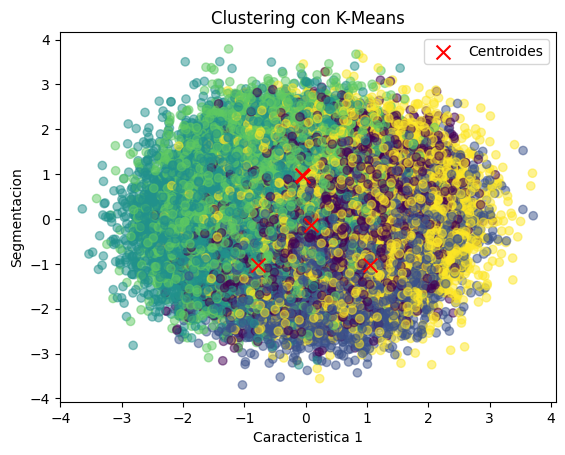

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2D utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Graficar los clusters y los centroides
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroides')
plt.title('Clustering con K-Means')
plt.xlabel('Caracteristica 1')
plt.ylabel('Segmentacion')
plt.legend()
plt.show()

Coordenadas de los centroides:

In [12]:
# Mostrar los centroides encontrados
print("Coordenadas de los centroides encontrados:")
for i, centroid in enumerate(centroids):
    print(f"Centroide {i+1}: {centroid}")

Coordenadas de los centroides encontrados:
Centroide 1: [-0.78108406 -1.02834389 -0.01446023  0.06563067 -0.02166107  0.01081971
 -0.04789629 -0.0435363   0.0274349  -0.01280469 -0.04477081  0.03739867
 -0.02012589 -0.01834373  0.05173325  0.4353676   0.01350532]
Centroide 2: [ 1.04666997 -1.02578386  0.00749877  0.02639601  0.02075166 -0.00655687
 -0.03766724  0.04471425  0.0316712   0.02376541  0.01441177 -0.00233606
  0.01932079 -0.02955881 -0.04262301  0.46476956 -0.01839332]
Centroide 3: [-0.04893829  0.96797305  1.12035105 -0.01644462  0.00572086 -0.08464184
 -0.05522055 -0.04812161 -0.11476798 -0.04922271 -0.06110403 -0.13479476
  0.07249687  0.0873578  -0.00995208  0.10057457 -0.05379784]
Centroide 4: [-0.05856476  0.97243734 -0.72120427 -0.07328467  0.01643149  0.05136508
  0.01574565  0.04888489 -0.00927951 -0.14310642  0.02467846  0.01102102
  0.02331472 -0.02578367  0.01648954  0.49770335  0.04950856]
Centroide 5: [ 8.51656561e-02 -1.39544933e-01 -2.34977813e-01  9.43170859

**Determinar el numero óptimo de clusters**

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.041363467884567504

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

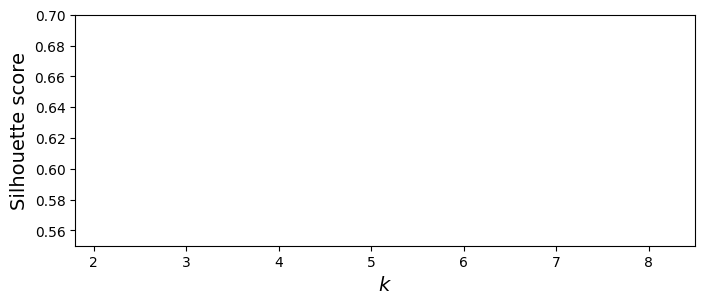

In [10]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()